In [40]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

vocabulary ='0123456789+- '
print('Vocabulary: ', vocabulary)
num_features = len(vocabulary)   
print('Number of features:', num_features)   


def generate_data():
    first_num = np.arange(0,100,1)
    second_num = np.arange(0,100,1) 
    query=[]
    answer=[]
    for i in first_num:
        for j in second_num:
            #Query 
            expression = str(i) + '+' + str(j)
            expression= expression.ljust(5)
            query.append(expression)
            expression = str(i) + '-' + str(j)
            expression= expression.ljust(5)
            query.append(expression)
            
            #Answers
            result = (i+j)
            result= f'{result:+}'
            result=str(result.ljust(4))
            answer.append(result)
            result =(i-j)
            result= f'{result:+}'
            result=str(result.ljust(4))
            answer.append(result)        
    return query,answer


Vocabulary:  0123456789+- 
Number of features: 13


In [41]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
def one_hot_encoding(x,y):
    alphabets = ['0','1','2','3','4','5','6','7','8','9','+','-',' ']
    char_to_int = dict((c, i) for i, c in enumerate(alphabets))
    int_to_char = dict((i, c) for i, c in enumerate(alphabets))
    
    #One-hot Encoding for x
    one_hot_x = []
    for i in x:
        vec_x = [char_to_int[char] for char in i]
        encode_x = list()
        for value_x in vec_x:
            x_value = [0 for _ in range(len(alphabets))]
            x_value[value_x] = 1
            encode_x.append(x_value)
        one_hot_x.append(encode_x)
    
    #One-hot Encoding for y        
    one_hot_y= []
    for j in y:
        vec_y = [char_to_int[char] for char in j]
        encode_y = list()
        for value_y in vec_y:
            y_value = [0 for _ in range(len(alphabets))]
            y_value[value_y] = 1
            encode_y.append(y_value)
        one_hot_y.append(encode_y)
    
    return one_hot_x, one_hot_y

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def build_model():
    model = Sequential()
    # Encode the input using LSTM, producing an output of size 256
    model.add(LSTM(256, input_shape=(5, 13), return_sequences=False))
    
    #RepeatVector(4) because the maximum length of output is 4.Providing input for decoder RNN
    model.add(RepeatVector(4))
    
    #Decoder RNN layer
    model.add(LSTM(256, return_sequences=True))

    model.add(Dense(13, activation="softmax"))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"])
    return model

In [43]:
from sklearn.utils import shuffle

x,y = generate_data()
x = np.array(x)
y = np.array(y)
X_shuffled,y_shuffled = shuffle(x, y, random_state=0)
X,Y = one_hot_encoding(X_shuffled,y_shuffled)

#70% of the data  -train data
train_x = X[:14000]
train_y = Y[:14000]
train_x = np.array(train_x)
train_y = np.array(train_y)

#15% of data - validation data
val_x = X[14000:17000]
val_y = Y[14000:17000]         
val_x = np.array(val_x)
val_y = np.array(val_y)

#15% of data - test data
test_x = X[17000:]
test_y = Y[17000:]
test_x = np.array(test_x)
test_y = np.array(test_y)


In [44]:
print("Original query dataset(x) shape:", x.shape)
print("Original answer dataset(y) shape:", y.shape)
print("X train data shape:", train_x.shape)
print("Y train data sahpe:", train_y.shape)
print("X validation data shape:", val_x.shape)
print("Y validation data sahpe:", val_y.shape)
print("X test data shape:", test_x.shape)
print("Y test data sahpe:", test_y.shape)

Original query dataset(x) shape: (20000,)
Original answer dataset(y) shape: (20000,)
X train data shape: (14000, 5, 13)
Y train data sahpe: (14000, 4, 13)
X validation data shape: (3000, 5, 13)
Y validation data sahpe: (3000, 4, 13)
X test data shape: (3000, 5, 13)
Y test data sahpe: (3000, 4, 13)


In [45]:
actual_model = build_model()
actual_history = actual_model.fit(train_x, train_y, epochs=30, batch_size=32, validation_data=(val_x,val_y))

Epoch 1/30
438/438 [==============================] - 19s 34ms/step - loss: 1.4020 - accuracy: 0.5062 - val_loss: 1.1657 - val_accuracy: 0.5833
Epoch 2/30
438/438 [==============================] - 14s 31ms/step - loss: 1.0562 - accuracy: 0.6136 - val_loss: 0.9756 - val_accuracy: 0.6498
Epoch 3/30
438/438 [==============================] - 14s 31ms/step - loss: 0.9350 - accuracy: 0.6563 - val_loss: 0.8716 - val_accuracy: 0.6839
Epoch 4/30
438/438 [==============================] - 14s 32ms/step - loss: 0.8581 - accuracy: 0.6819 - val_loss: 0.8540 - val_accuracy: 0.6702
Epoch 5/30
438/438 [==============================] - 14s 32ms/step - loss: 0.7973 - accuracy: 0.7018 - val_loss: 0.7874 - val_accuracy: 0.7057
Epoch 6/30
438/438 [==============================] - 14s 32ms/step - loss: 0.7562 - accuracy: 0.7162 - val_loss: 0.7419 - val_accuracy: 0.7210
Epoch 7/30
438/438 [==============================] - 14s 32ms/step - loss: 0.7270 - accuracy: 0.7256 - val_loss: 0.7240 - val_accuracy:

In [46]:
actual_result = actual_model.evaluate(test_x, test_y)
print("Loss:", actual_result[0])
print("Accuracy:", actual_result[1])

94/94 [==============================] - 1s 11ms/step - loss: 0.0251 - accuracy: 0.9948
Loss: 0.02510182373225689
Accuracy: 0.9947500228881836


In [47]:
#Reversing the data set
x,y = generate_data()
X_shuffled,y_shuffled = shuffle(x, y, random_state=0)
X,Y = one_hot_encoding(X_shuffled,y_shuffled)
reversed_x, reversed_y = np.flip(X, axis=1), np.flip(Y, axis=1)

#70% of the data  -train data
reverse_train_x = X[:14000]
reverse_train_y = Y[:14000]
reverse_train_x = np.array(train_x)
reverse_train_y = np.array(train_y)

#15% of data - validation data
reverse_val_x = X[14000:17000]
reverse_val_y = Y[14000:17000]         
reverse_val_x = np.array(val_x)
reverse_val_y = np.array(val_y)

#15% of data - test data
reverse_test_x = X[17000:]
reverse_test_y = Y[17000:]
reverse_test_x = np.array(test_x)
reverse_test_y = np.array(test_y)


In [48]:
#Training model with reversed dataset 
reverse_model = build_model()
reversed_history = reverse_model.fit(reverse_train_x, reverse_train_y, 
                                     epochs=30, 
                                     batch_size=32,
                                     validation_data=(reverse_val_x,reverse_val_y))

Epoch 1/30
438/438 [==============================] - 19s 35ms/step - loss: 1.4051 - accuracy: 0.5065 - val_loss: 1.1534 - val_accuracy: 0.5795
Epoch 2/30
438/438 [==============================] - 15s 34ms/step - loss: 1.0600 - accuracy: 0.6126 - val_loss: 0.9753 - val_accuracy: 0.6457
Epoch 3/30
438/438 [==============================] - 15s 35ms/step - loss: 0.9324 - accuracy: 0.6577 - val_loss: 0.9022 - val_accuracy: 0.6648
Epoch 4/30
438/438 [==============================] - 16s 38ms/step - loss: 0.8530 - accuracy: 0.6839 - val_loss: 0.8194 - val_accuracy: 0.7018
Epoch 5/30
438/438 [==============================] - 15s 35ms/step - loss: 0.8002 - accuracy: 0.7011 - val_loss: 0.7843 - val_accuracy: 0.7027
Epoch 6/30
438/438 [==============================] - 15s 35ms/step - loss: 0.7651 - accuracy: 0.7120 - val_loss: 0.7389 - val_accuracy: 0.7216
Epoch 7/30
438/438 [==============================] - 16s 36ms/step - loss: 0.7328 - accuracy: 0.7228 - val_loss: 0.7195 - val_accuracy:

In [49]:
reverse_result = reverse_model.evaluate(reverse_test_x, reverse_test_y)
print("Loss:", reverse_result[0])
print("Accuracy:", reverse_result[1])

94/94 [==============================] - 1s 12ms/step - loss: 0.0458 - accuracy: 0.9871
Loss: 0.04581835865974426
Accuracy: 0.9870833158493042


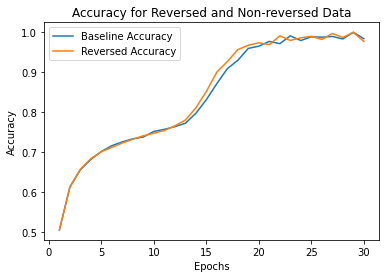

In [50]:
# Plotting accuracy
import matplotlib.pyplot as plt
plt.clf()
normal_accuracy = actual_history.history['accuracy']
reversed_accuracy = reversed_history.history['accuracy']
epochs = range(1, len(normal_accuracy) + 1)
plt.plot(epochs, normal_accuracy, linestyle = '-', label = 'Baseline Accuracy')
plt.plot(epochs, reversed_accuracy ,linestyle= '-', label = 'Reversed Accuracy')
plt.title('Accuracy for Reversed and Non-reversed Data')
plt.xlabel('Epochs')
plt.ylabel ('Accuracy')
plt.legend()
plt.show()

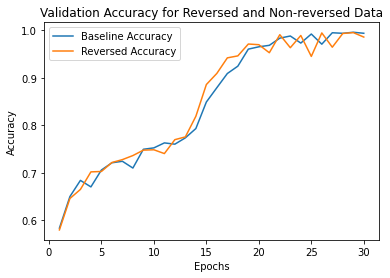

In [51]:
plt.clf()
normal_accuracy = actual_history.history['val_accuracy']
reversed_accuracy = reversed_history.history['val_accuracy']
epochs = range(1, len(normal_accuracy) + 1)
plt.plot(epochs, normal_accuracy, linestyle = '-', label = 'Baseline Accuracy')
plt.plot(epochs, reversed_accuracy ,linestyle= '-', label = 'Reversed Accuracy')
plt.title('Validation Accuracy for Reversed and Non-reversed Data')
plt.xlabel('Epochs')
plt.ylabel ('Accuracy')
plt.legend()
plt.show()